In [1]:
from collections import namedtuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
InitialState = namedtuple('initial_state',
                          "number_of_people initially_ill initially_recovered time_range")

# The SIR model differential equations. 
# https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology
def derive(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def solve(total_infected_people_while_ill, days_being_ill, initial_state):
    S0 = initial_state.number_of_people - \
    initial_state.initially_ill - \
    initial_state.initially_recovered
    
    initial_conditions_vector = (S0,
                                 initial_state.initially_ill,
                                 initial_state.initially_recovered)
    
    # Integrate the SIR equations over the time range, t.
    beta = total_infected_people_while_ill/days_being_ill
    gamma = 1/days_being_ill
    integral = odeint(derive,
                      initial_conditions_vector,
                      initial_state.time_range,
                      args=(initial_state.number_of_people, beta, gamma))
    return integral.T

def plot(values, labels, dates_range):
    plt.rcParams['font.size'] = 18
    fig = plt.figure(facecolor='w',  figsize=(16, 10))
    ax = fig.add_subplot(111, axisbelow=True)
    for value, label in zip(values, labels):
        ax.plot(dates_range, value, alpha=0.5, lw=2, 
                label=f'Ill infecting {label} healthy people')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of infected people in Millions')
    ax.grid(True)
    legend = ax.legend()
    plt.title("SIR model Covid-19: Number of infected people in Bulgaria")
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.xticks(rotation=70)
    plt.show()

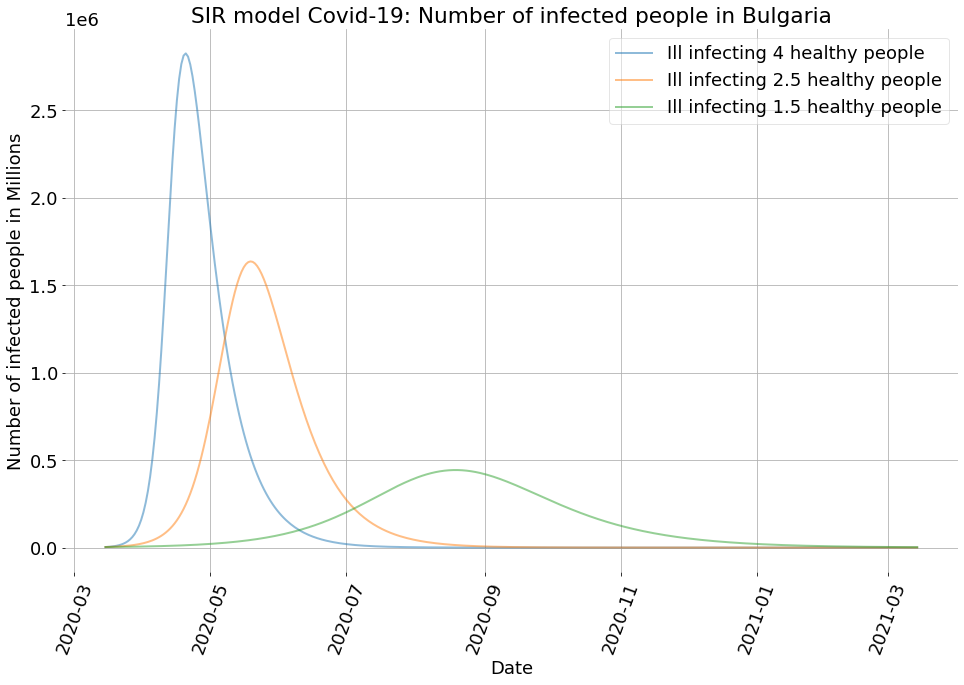

In [3]:
total_population = 7_000_000
initial_number_of_infected = 3000
initial_number_of_recovered = 0
days_being_ill = 12
possible_total_infected_people_while_ill = [4, 2.5, 1.5]

time_range = np.linspace(0, 365, 365)
values = []
labels = []

initial_state = InitialState(total_population, 
                             initial_number_of_infected,
                             initial_number_of_recovered,
                             time_range)

for total_infected_people_while_ill in possible_total_infected_people_while_ill:
    s, infected, r = solve(total_infected_people_while_ill,
                            days_being_ill,
                            initial_state)
    values.append(infected)
    labels.append(total_infected_people_while_ill)

dates = pd.date_range(start='15/3/2020', end='15/03/2021')[:len(initial_state.time_range)]
plot(values, labels, dates)